# KNN: Breast Cancer Wisconsin (Diagnostic) Dataset (D2) - Minmax Scaling


## Loading Packages

In [55]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## Loading the dataset

In [56]:
df = pd.read_csv("data.csv")
data_df = df.drop(columns=["diagnosis"]) # drop label

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)
y = df["diagnosis"]

## Data Preparation

#### Training Set

In [57]:
data_train_df = data_df.sample(frac=0.8, random_state=0) # sample 80% for training 
data_train_y = y[data_train_df.index]

data_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
512,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338566,0.406163,0.533333,0.490522,...,0.301672,0.470149,0.313213,0.162013,0.569438,0.347634,0.407827,0.704811,0.398186,0.366391
457,0.294808,0.525533,0.278557,0.167296,0.318498,0.100209,0.064948,0.102783,0.282323,0.123842,...,0.228388,0.591951,0.203596,0.110032,0.381232,0.076656,0.111022,0.206357,0.173270,0.084219
439,0.333144,0.201217,0.316495,0.196394,0.244019,0.111742,0.048899,0.131809,0.267172,0.124263,...,0.248310,0.194296,0.229693,0.123796,0.212838,0.072193,0.050000,0.282337,0.112557,0.079103
298,0.344503,0.286101,0.327759,0.207678,0.118534,0.100669,0.057990,0.068290,0.290404,0.124263,...,0.294913,0.352878,0.275860,0.155943,0.153734,0.183767,0.125000,0.258763,0.211118,0.142464
37,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,0.205556,0.182603,...,0.191035,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618


In [58]:
data_train_y

512    0
457    1
439    1
298    1
37     1
      ..
86     0
266    1
36     0
193    0
58     1
Name: diagnosis, Length: 455, dtype: int64

#### Test Set

In [59]:
data_test_df = data_df.drop(data_train_df.index) # get remaining 20%
data_test_y = y[data_test_df.index]       

data_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000
23,0.671068,0.450795,0.645498,0.534677,0.376004,0.254033,0.257029,0.429026,0.358081,0.059393,...,0.755603,0.628198,0.685243,0.597179,0.455194,0.225776,0.251997,0.690378,0.247782,0.132625
28,0.393724,0.526209,0.405017,0.249799,0.501670,0.461076,0.394330,0.434940,0.437374,0.325190,...,0.438990,0.658049,0.492505,0.266368,0.613683,0.566318,0.505990,0.695533,0.485314,0.286764
41,0.187846,0.393642,0.194251,0.096543,0.632572,0.314153,0.244611,0.281759,0.421717,0.394693,...,0.174671,0.621535,0.183326,0.080810,0.790662,0.235284,0.321326,0.489347,0.275774,0.269054


## Creating and Training the Model

#### k = 1

In [60]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(data_train_df, data_train_y)

KNeighborsClassifier(n_neighbors=1)

#### k = 3

In [61]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(data_train_df, data_train_y)

KNeighborsClassifier(n_neighbors=3)

## Predicting Labels for Test Set

In [62]:
# k = 1
knn1_prediction = knn1.predict(data_test_df)
knn1_prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [63]:
# k = 3
knn3_prediction = knn3.predict(data_test_df)
knn3_prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

## Evaluating the KNN Models

#### Results for k = 1

In [64]:
# Accuracy
acc1 = knn1.score(data_test_df, data_test_y)
acc1

0.9649122807017544

In [65]:
# Confusion Matrix
cm1 = confusion_matrix(data_test_y, knn1_prediction)
cm1

array([[41,  3],
       [ 1, 69]], dtype=int64)

#### Results for k = 3

In [66]:
# Accuracy (Best Accuracy)
acc3 = knn3.score(data_test_df, data_test_y)
acc3

0.9736842105263158

In [67]:
# Confusion Matrix
cm3 = confusion_matrix(data_test_y, knn3_prediction)
cm3

array([[42,  2],
       [ 1, 69]], dtype=int64)

In [68]:
print("kNN, k = 1 accuracy:", acc1)
print(cm1)

print("kNN, k = 3 accuracy:", acc3)
print(cm3)

kNN, k = 1 accuracy: 0.9649122807017544
[[41  3]
 [ 1 69]]
kNN, k = 3 accuracy: 0.9736842105263158
[[42  2]
 [ 1 69]]


In [71]:
# k = 5 has the best accuracy
# range 5 - 11
best_k = 0
best_k_model = None
best_k_acc = 0

for k in range(5,12):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train_df, data_train_y)
    
    score = knn.score(data_test_df, data_test_y)
    print("K = " + str(k))
    print("Accuracy: " + str(score) + "\n")

K = 5
Accuracy: 1.0

K = 6
Accuracy: 0.9912280701754386

K = 7
Accuracy: 0.9912280701754386

K = 8
Accuracy: 0.9912280701754386

K = 9
Accuracy: 0.9736842105263158

K = 10
Accuracy: 0.9824561403508771

K = 11
Accuracy: 0.9824561403508771



# Decision Tree

### Loading Packages

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler


#### First 10 Features

In [75]:

# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_scale = MinMaxScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

data_df2 = data_df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]] # int cause of dataframe conversion of scaled data
y = df["diagnosis"]  
data_classes = ["0", "1"]

data_features = data_df2.columns.tolist()
data_features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [76]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [77]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [78]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.8903508771929824
[[ 80   9]
 [ 16 123]]


In [79]:
# Decision Tree Viz (First 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- 7 <= 0.28
|   |--- 3 <= 0.23
|   |   |--- 7 <= 0.22
|   |   |   |--- 7 <= 0.15
|   |   |   |   |--- 1 <= 0.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 1 >  0.43
|   |   |   |   |   |--- 1 <= 0.44
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 1 >  0.44
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- 7 >  0.15
|   |   |   |   |--- 5 <= 0.14
|   |   |   |   |   |--- 2 <= 0.30
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 2 >  0.30
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- 5 >  0.14
|   |   |   |   |   |--- 7 <= 0.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- 7 >  0.15
|   |   |   |   |   |   |--- class: 1
|   |   |--- 7 >  0.22
|   |   |   |--- 9 <= 0.34
|   |   |   |   |--- 8 <= 0.46
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 8 >  0.46
|   |   |   |   |   |--- class: 1
|   |   |   |--- 9 >  0.34
|   |   |   |   |--- 6 <= 0.26
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 

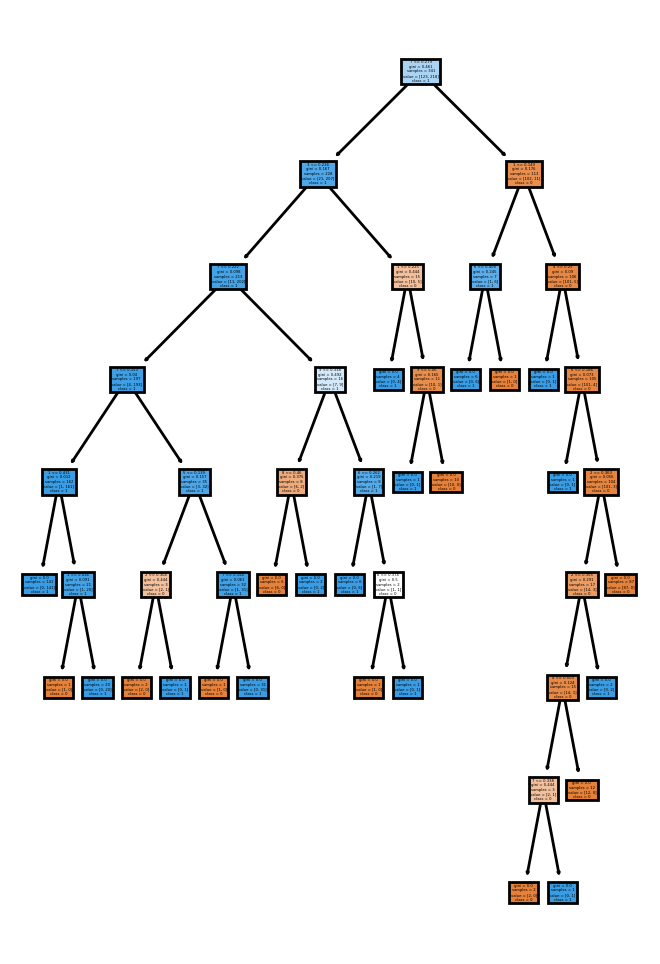

In [80]:
# Decision Tree Better Viz (First 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

#### Middle 10 Features

In [87]:
# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_scale = MinMaxScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

data_df2 = data_df[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
y = df["diagnosis"]  
data_classes = ["0", "1"]

data_features = data_df2.columns.tolist()
data_features

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [88]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [89]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [90]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.7982456140350878
[[ 68  21]
 [ 25 114]]


In [91]:
# Decision Tree Viz (Middle 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- 13 <= 0.05
|   |--- 14 <= 0.04
|   |   |--- class: 0
|   |--- 14 >  0.04
|   |   |--- 15 <= 0.23
|   |   |   |--- 18 <= 0.10
|   |   |   |   |--- 17 <= 0.23
|   |   |   |   |   |--- 18 <= 0.10
|   |   |   |   |   |   |--- 12 <= 0.05
|   |   |   |   |   |   |   |--- 14 <= 0.06
|   |   |   |   |   |   |   |   |--- 16 <= 0.03
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- 16 >  0.03
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- 14 >  0.06
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- 12 >  0.05
|   |   |   |   |   |   |   |--- 14 <= 0.11
|   |   |   |   |   |   |   |   |--- 10 <= 0.08
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- 10 >  0.08
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- 14 >  0.11
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 18 >  0.10
|   |   |   |   |   |   |-

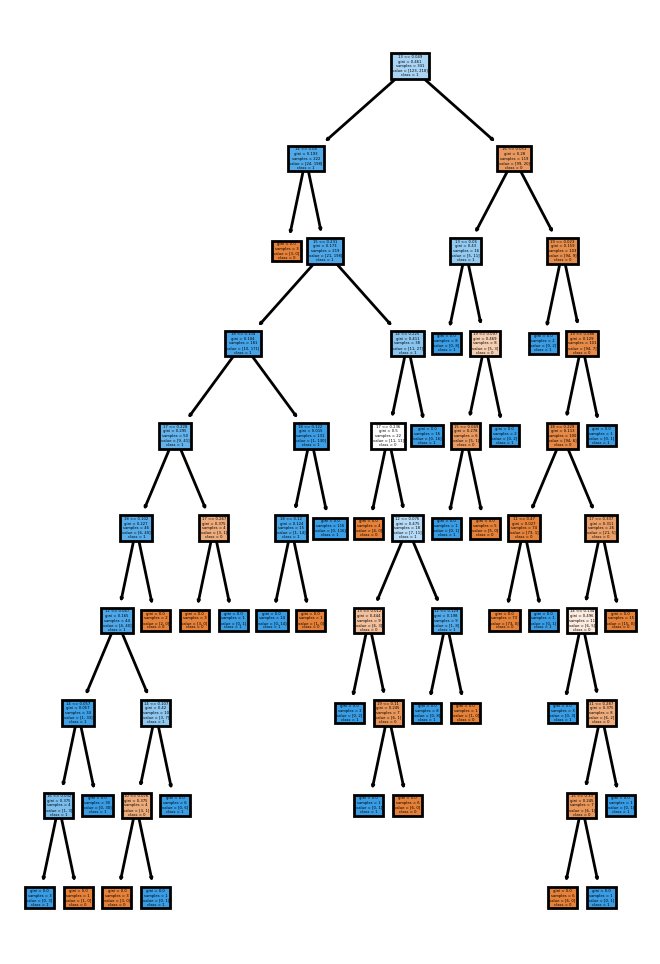

In [92]:
# Decision Tree Better Viz (Middle 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

#### Last 10 Features

In [93]:
# Loading Dataset
df = pd.read_csv('data.csv')                   
data_df = df.drop(columns=["diagnosis"])
data_scale = MinMaxScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

data_df2 = data_df[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
y = df["diagnosis"]  
data_classes = ["0", "1"]

data_features = data_df2.columns.tolist()
data_features

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [94]:
# Data Prep
# Split training (60%) and test (40%)
data_train_df = data_df2.sample(frac=0.6, random_state=0)         
data_train_y = y[data_train_df.index]      

data_test_df = data_df2.drop(data_train_df.index) 
data_test_y = y[data_test_df.index]  

In [95]:
# Train Model
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(data_train_df, data_train_y)

In [96]:
# Evaluate Model

prediction = dt_classifier.predict(data_test_df)
accuracy = dt_classifier.score(data_test_df, data_test_y)
conf_matrix = confusion_matrix(data_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.9210526315789473
[[ 82   7]
 [ 11 128]]


In [97]:
# Decision Tree Viz (Last 10)

# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=data_features)
print(tree_text)

|--- 22 <= 0.27
|   |--- 27 <= 0.59
|   |   |--- 28 <= 0.00
|   |   |   |--- class: 0
|   |   |--- 28 >  0.00
|   |   |   |--- 21 <= 0.52
|   |   |   |   |--- 28 <= 0.08
|   |   |   |   |   |--- 28 <= 0.08
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 28 >  0.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- 28 >  0.08
|   |   |   |   |   |--- class: 1
|   |   |   |--- 21 >  0.52
|   |   |   |   |--- 27 <= 0.45
|   |   |   |   |   |--- 24 <= 0.46
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 24 >  0.46
|   |   |   |   |   |   |--- 26 <= 0.22
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- 26 >  0.22
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- 27 >  0.45
|   |   |   |   |   |--- class: 0
|   |--- 27 >  0.59
|   |   |--- 26 <= 0.84
|   |   |   |--- class: 0
|   |   |--- 26 >  0.84
|   |   |   |--- class: 1
|--- 22 >  0.27
|   |--- 21 <= 0.23
|   |   |--- 24 <= 0.43
|   |   |   |--- class: 1
|   |   |-

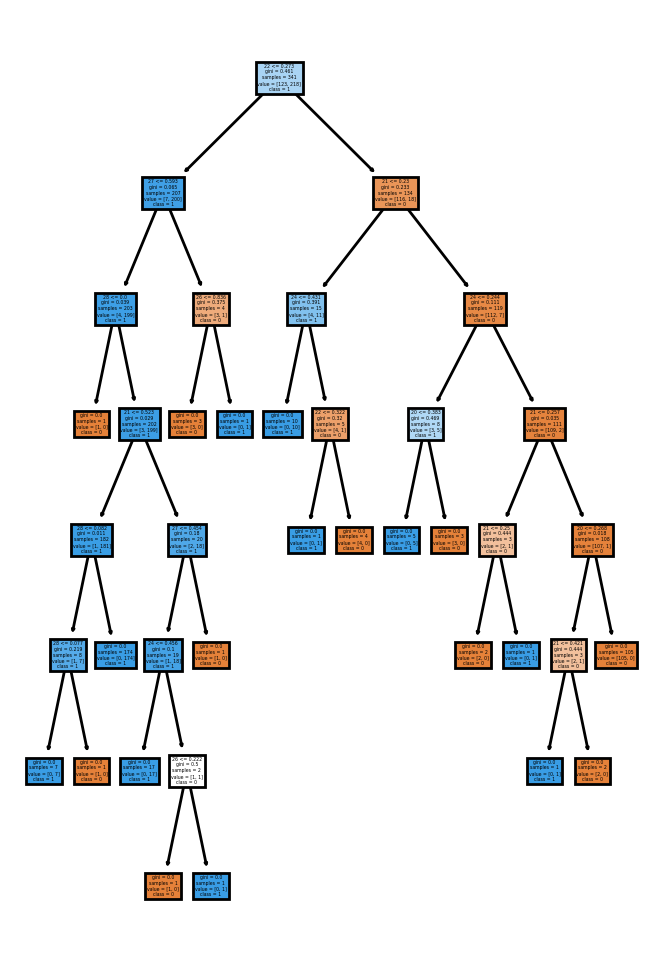

In [98]:
# Decision Tree Better Viz (Last 10)

# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=data_features, class_names=data_classes, ax=axes)
plt.show()

# Clustering

### Loading Packages

In [99]:
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [100]:
# Load Dataset
df = pd.read_csv("data.csv")
data_df = df.drop(columns=["diagnosis"]) # drop label
data_scale = MinMaxScaler()
scaled_data = data_scale.fit_transform(data_df)
data_df = pd.DataFrame(scaled_data)

y = df["diagnosis"]
data_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [101]:
# two features selected (Apparently, also important: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043900/)

col1 = 9 # fractal_di0ension_0ean
col2 = 29 # fractal_di0ension_worst

In [102]:
# new dataframe with only two features
new_df = data_df[[col1, col2]]
new_df

,9,29
0,0.605518,0.418864
1,0.141323,0.222878
2,0.211247,0.213433
3,1.000000,0.773711
4,0.186816,0.142595
...,...,...
564,0.132056,0.105667
565,0.113100,0.074315
566,0.137321,0.151909
567,0.425442,0.452315


<Axes: xlabel='9', ylabel='29'>

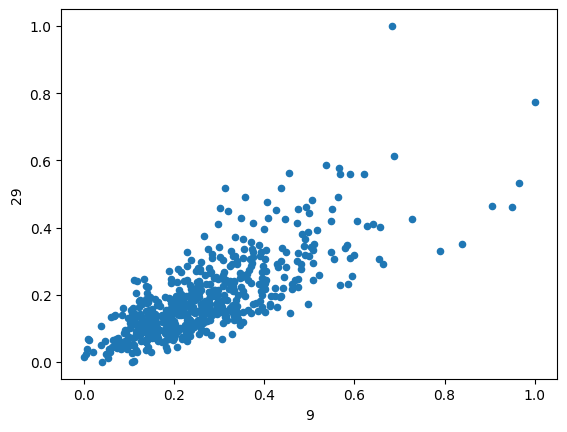

In [103]:
new_df.plot.scatter(col1, col2)

# Hierarchical Clustering

### Dendrogram

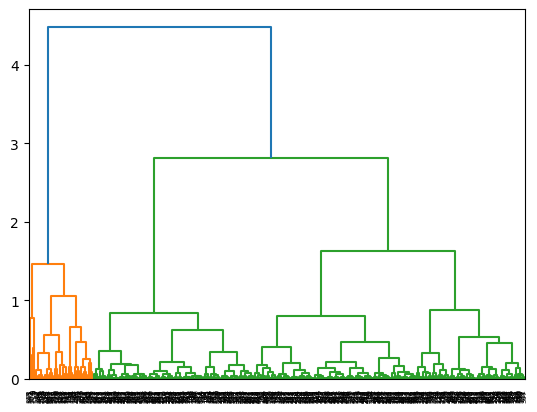

In [104]:
# Dendrogram

dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

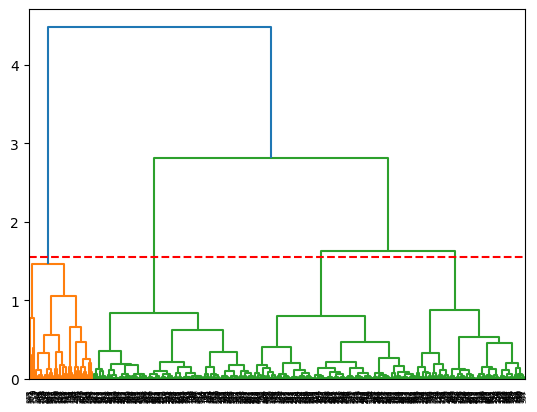

In [109]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

plt.axhline(y=1.55, color='r', linestyle='--')
plt.show()

In [110]:
agg_model = AgglomerativeClustering(n_clusters=4, 
                                    metric='euclidean', 
                                    linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

<Axes: xlabel='9', ylabel='29'>

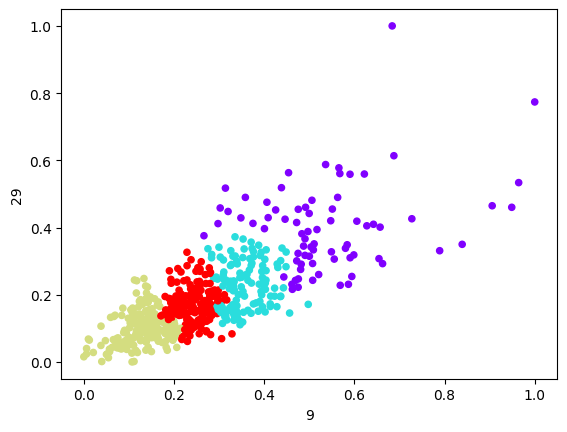

In [111]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

# K-Means

### Silhouette Score

In [112]:
# k_range is from k=2 to k=16 (same range as lab 3)
k_range = range(2, 17)


for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km_model.fit(new_df)
    km_labels = km_model.predict(new_df)
    avg = silhouette_score(new_df, km_labels)
    
    print((k, round(avg, 4)))

(2, 0.5387)
(3, 0.4384)
(4, 0.3982)
(5, 0.3715)
(6, 0.35)
(7, 0.334)
(8, 0.3317)
(9, 0.3316)
(10, 0.333)
(11, 0.3308)
(12, 0.3271)
(13, 0.342)
(14, 0.3447)
(15, 0.3386)
(16, 0.3485)


In [113]:
# closest to 1 is cluster 2 (k = 2)
km_model = KMeans(n_clusters=2, 
                  n_init='auto', random_state=0)
km_model.fit(new_df)

KMeans(n_clusters=2, n_init='auto', random_state=0)

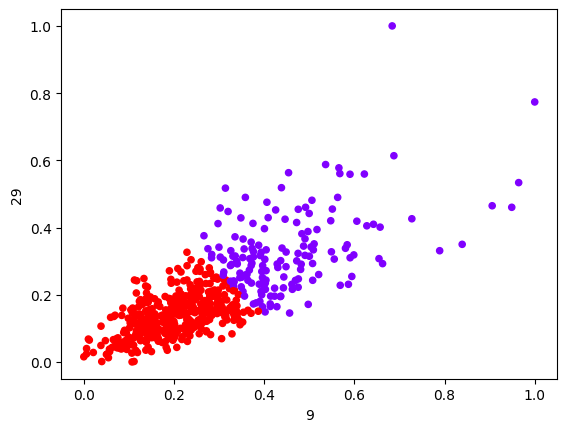

In [114]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### Inertia: Elbow Method

In [115]:
# k_range is from k=1 to k=16 (same range as lab 3)
k_range = range(2, 17)

k_list = []
k_inertia_list = []

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto", random_state=1)
    km_model.fit(new_df)
    k_inertia_list.append(km_model.inertia_)
    
    k_list.append(k)
    
    print(str(k) + ": " + str(round(km_model.inertia_, 4)))

2: 9.0719
3: 5.9039
4: 4.5243
5: 3.7524
6: 3.4614
7: 2.9838
8: 2.6488
9: 2.3578
10: 2.0392
11: 1.8193
12: 1.6695
13: 1.4931
14: 1.3493
15: 1.2389
16: 1.178


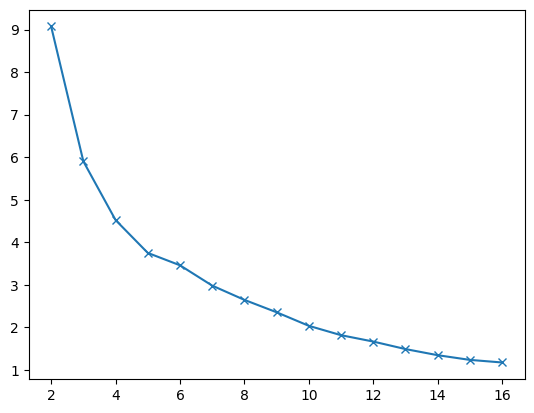

In [116]:
plt.plot(k_list, k_inertia_list, 'x-')
plt.show()

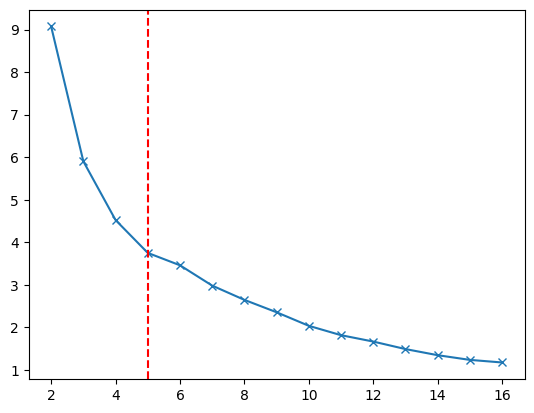

In [117]:
plt.plot(k_list, k_inertia_list, 'x-')

# plot a vertical line at x = 5 (k = 5)
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

In [118]:
km_model = KMeans(n_clusters=5, 
                  n_init="auto", 
                  random_state=1)
km_model.fit(new_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

<Axes: xlabel='9', ylabel='29'>

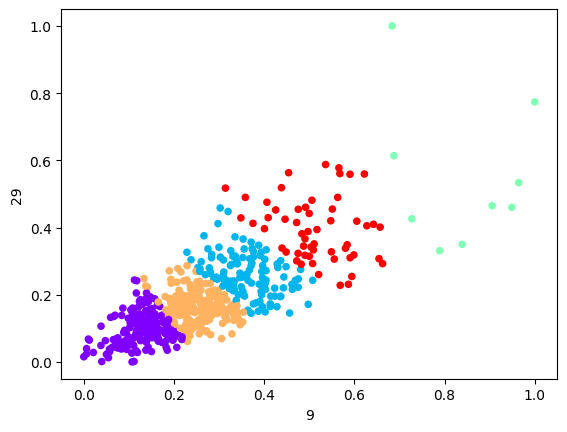

In [119]:
new_df.plot.scatter(col1, col2, c = km_model.labels_, 
                    cmap="rainbow",
                    colorbar=False)